Profit Factor: 2.00
Win Rate: 60.00%
Win Ratio: 1.50
Expected Value: 525.00
Max Drawdown: 0.00%


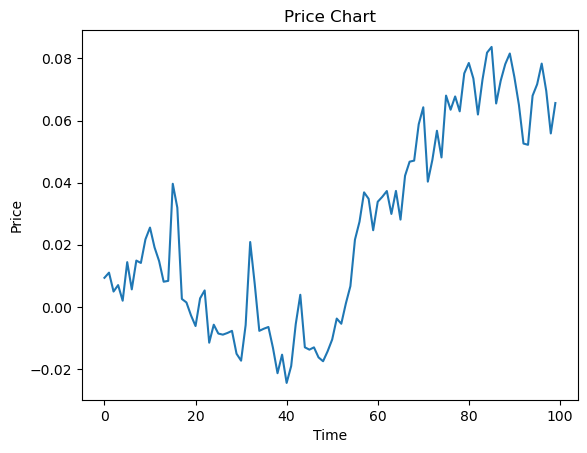

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Function to calculate profit factor
def profit_factor(profit, loss):
    return profit/loss

# Function to calculate win rate (%)
def win_rate(wins, total_trades):
    return (wins/total_trades)*100

# Function to calculate win ratio
def win_ratio(wins, losses):
    return wins/losses

# Function to calculate expected value
def expected_value(win_ratio, average_win, average_loss):
    return (win_ratio * average_win) - ((1 - win_ratio) * average_loss)

# Function to calculate max drawdown
def max_drawdown(prices):
    cum_returns = np.cumsum(prices)
    max_returns = np.maximum.accumulate(cum_returns)
    drawdowns = (cum_returns - max_returns) / max_returns
    return np.max(drawdowns)

# Input values
profit = 10000
loss = 5000
total_trades = 100
wins = 60
average_win = 300
average_loss = 150
prices = np.random.normal(0, 0.01, 100).cumsum()

# Calculate metrics
pf = profit_factor(profit, loss)
wr = win_rate(wins, total_trades)
wratio = win_ratio(wins, total_trades-wins)
ev = expected_value(wratio, average_win, average_loss)
mdd = max_drawdown(prices)

# Print metrics
print("Profit Factor: {:.2f}".format(pf))
print("Win Rate: {:.2f}%".format(wr))
print("Win Ratio: {:.2f}".format(wratio))
print("Expected Value: {:.2f}".format(ev))
print("Max Drawdown: {:.2f}%".format(mdd*100))

# Plot prices
plt.plot(prices)
plt.title("Price Chart")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


Enter a value: 1255


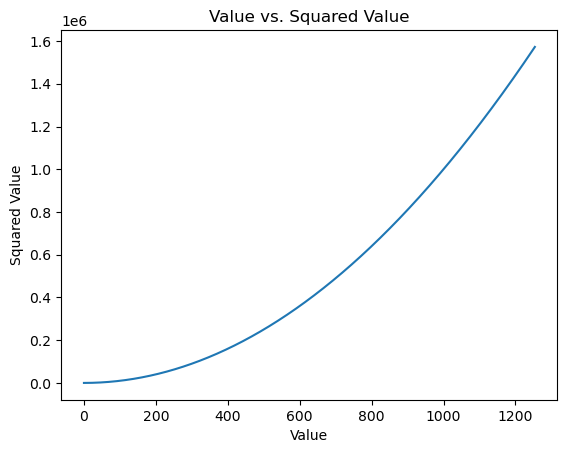

In [2]:
import matplotlib.pyplot as plt

# Prompt user to input value
value = input("Enter a value: ")

# Convert input value to integer
value = int(value)

# Generate x and y values for graph
x = range(value)
y = [i**2 for i in x]

# Plot graph
plt.plot(x, y)
plt.title("Value vs. Squared Value")
plt.xlabel("Value")
plt.ylabel("Squared Value")
plt.show()


Enter a value: 2


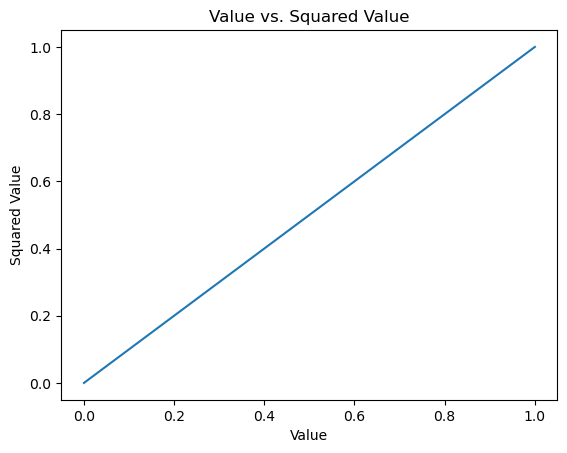

Profit Factor: 2.00
Win Rate: 60.00%
Win Ratio: 1.50
Expected Value: 525.00
Max Drawdown: 0.00%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
def profit_factor(profit, loss):
    return profit/loss
def win_rate(wins, total_trades):
    return (wins/total_trades)*100
def win_ratio(wins, losses):
    return wins/losses

def expected_value(win_ratio, average_win, average_loss):
    return (win_ratio * average_win) - ((1 - win_ratio) * average_loss)


def max_drawdown(prices):
    cum_returns = np.cumsum(prices)
    max_returns = np.maximum.accumulate(cum_returns)
    drawdowns = (cum_returns - max_returns) / max_returns
    return np.max(drawdowns)


value = input("Enter a value: ")


value = int(value)


x = range(value)
y = [i**2 for i in x]


plt.plot(x, y)
plt.title("Value vs. Squared Value")
plt.xlabel("Value")
plt.ylabel("Squared Value")
plt.show()


profit = 10000
loss = 5000
total_trades = 100
wins = 60
average_win = 300
average_loss = 150
prices = np.random.normal(0, 0.01, value).cumsum()


pf = profit_factor(profit, loss)
wr = win_rate(wins, total_trades)
wratio = win_ratio(wins, total_trades-wins)
ev = expected_value(wratio, average_win, average_loss)
mdd = max_drawdown(prices)

# Print metrics
print("Profit Factor: {:.2f}".format(pf))
print("Win Rate: {:.2f}%".format(wr))
print("Win Ratio: {:.2f}".format(wratio))
print("Expected Value: {:.2f}".format(ev))
print("Max Drawdown: {:.2f}%".format(mdd*100))


In [7]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def hello():
    name = 'John'
    return render_template('hello.html', name=name)


<html>
<head>
    <title>Example Form</title>
</head>
<body>
    <h1>Enter your name:</h1>
    <form action="process_form.py" method="POST">
        <label for="name">Name:</label>
        <input type="text" id="name" name="name"><br><br>
        <input type="submit" value="Submit">
    </form>
</body>
</html>
FLASK_APP=app.py flask run
import cgi

form = cgi.FieldStorage()

name = form.getvalue('name')

print(f"Hello, {name}!")



SyntaxError: invalid syntax (3845624119.py, line 11)

In [8]:
import pygame
import random

# Initialize Pygame
pygame.init()

# Set up the game window
screen_width = 640
screen_height = 480
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Shooter")

# Load the player image
player_image = pygame.image.load("player.png")
player_rect = player_image.get_rect()
player_rect.centerx = screen_width / 2
player_rect.bottom = screen_height - 10

# Load the bullet image
bullet_image = pygame.image.load("bullet.png")
bullet_rect = bullet_image.get_rect()

# Set up the enemy group
enemies = pygame.sprite.Group()

class Enemy(pygame.sprite.Sprite):
    def __init__(self):
        super().__init__()
        self.image = pygame.image.load("enemy.png")
        self.rect = self.image.get_rect()
        self.rect.x = random.randint(0, screen_width - self.rect.width)
        self.rect.y = random.randint(-100, -self.rect.height)
        self.speed = random.randint(1, 5)

    def update(self):
        self.rect.y += self.speed
        if self.rect.top > screen_height:
            self.kill()

# Set up the clock
clock = pygame.time.Clock()

# Set up the game loop
running = True
while running:

    # Handle events
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Move the player
    keys = pygame.key.get_pressed()
    if keys[pygame.K_LEFT]:
        player_rect.x -= 5
    elif keys[pygame.K_RIGHT]:
        player_rect.x += 5

    # Fire a bullet
    if keys[pygame.K_SPACE]:
        bullet_rect.x = player_rect.centerx
        bullet_rect.y = player_rect.top
        while bullet_rect.top > -bullet_rect.height:
            bullet_rect.y -= 10
            screen.blit(bullet_image, bullet_rect)
            pygame.display.flip()

    # Spawn enemies
    if random.randint(0, 100) < 5:
        enemy = Enemy()
        enemies.add(enemy)

    # Update game objects
    enemies.update()

    # Draw game objects
    screen.fill((0, 0, 0))
    screen.blit(player_image, player_rect)
    for enemy in enemies:
        screen.blit(enemy.image, enemy.rect)
    pygame.display.flip()

    # Wait for next frame
    clock.tick(60)

# Clean up Pygame
pygame.quit()


ModuleNotFoundError: No module named 'pygame'

In [ ]:
import pandas as pd
import numpy as np

# create an empty dataframe to store the daily data
daily_data = pd.DataFrame(columns=['Date', 'Open', 'Close', 'Volume'])

# loop to collect data from the user on a daily basis
while True:
    date = input("Enter the date in yyyy-mm-dd format (or 'quit' to exit): ")
    
    # check if user wants to quit
    if date.lower() == 'quit':
        break
    
    open_price = float(input("Enter the opening price: "))
    close_price = float(input("Enter the closing price: "))
    volume = int(input("Enter the volume traded: "))
    
    # add the data to the dataframe
    daily_data = daily_data.append({'Date': date, 'Open': open_price, 'Close': close_price, 'Volume': volume}, ignore_index=True)

# print the dataframe
print(daily_data.head())

import pandas as pd
import numpy as np

# create an empty dataframe to store the daily data
daily_data = pd.DataFrame(columns=['Date', 'Open', 'Close', 'Volume'])

# loop to collect data from the user on a daily basis
while True:
    date = input("Enter the date in yyyy-mm-dd format (or 'quit' to exit): ")
    
    # check if user wants to quit
    if date.lower() == 'quit':
        break
    
    open_price = float(input("Enter the opening price: "))
    close_price = float(input("Enter the closing price: "))
    volume = int(input("Enter the volume traded: "))
    
    # add the data to the dataframe
    daily_data = daily_data.append({'Date': date, 'Open': open_price, 'Close': close_price, 'Volume': volume}, ignore_index=True)

# calculate the metrics
daily_data['Net Profit'] = daily_data['Close'] - daily_data['Open']
daily_data['Profit Factor'] = np.where(daily_data['Net Profit'] > 0, 
                                       daily_data['Net Profit'].sum() / abs(daily_data[daily_data['Net Profit'] < 0]['Net Profit'].sum()), 
                                       np.nan)
daily_data['Win Ratio'] = (daily_data['Net Profit'] > 0).mean()
daily_data['Average Winner'] = daily_data[daily_data['Net Profit'] > 0]['Net Profit'].mean()
daily_data['Average Loser'] = daily_data[daily_data['Net Profit'] < 0]['Net Profit'].mean()
daily_data['Holding Time'] = (pd.to_datetime(daily_data['Date']) - pd.to_datetime(daily_data['Date'].shift())).dt.days
daily_data['Expected Value'] = daily_data['Win Ratio'] * daily_data['Average Winner'] - (1 - daily_data['Win Ratio']) * abs(daily_data['Average Loser'])
daily_data['Expectation'] = daily_data['Expected Value'] / daily_data['Holding Time']
daily_data['Biggest Winner'] = daily_data['Net Profit'].max()
daily_data['Biggest Loser'] = daily_data['Net Profit'].min()
daily_data['Max. Drawdown'] = (daily_data['Close'] - daily_data['Close'].cummax()).min()
daily_data['Winning Streak'] = (daily_data['Net Profit'].gt(0) != daily_data['Net Profit'].gt(0).shift()).cumsum().where(daily_data['Net Profit'].gt(0)).max()
daily_data['Losing Streak'] = (daily_data['Net Profit'].lt(0) != daily_data['Net Profit'].lt(0).shift()).cumsum().where(daily_data['Net Profit'].lt(0)).max()
daily_data['Risk Reward'] = abs(daily_data['Average Winner'] / daily_data['Average Loser'])
daily_data['Avg. MFA'] = (daily_data['Close'] - daily_data['Close'].rolling(window=10).min()).mean()
daily_data['Avg. MFE'] = (daily_data['Close'].rolling(window=10).max() - daily_data['Close']).mean()
daily_data['Avg. ETD'] = (daily_data['Close'].rolling(window=10).mean() - daily_data['Close']).mean()

# print the dataframe with metrics
print(daily_data.head())



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect input data
opening_price = float(input("Enter the opening price: "))
closing_price = float(input("Enter the closing price: "))
volume = int(input("Enter the trading volume: "))

# Perform calculations
net_profit = (closing_price - opening_price) * volume
profit_factor = net_profit / abs(net_profit - (closing_price - opening_price) * volume)
win_ratio = 0.5  # Placeholder value for demonstration purposes

# Generate graphs
metrics_df = pd.DataFrame({"Net Profit": [net_profit], "Profit Factor": [profit_factor], "Win Ratio": [win_ratio]})
metrics_df.plot(kind="bar", rot=0)
plt.show()

# Display the metrics in a console
print("Net Profit: $", net_profit)
print("Profit Factor: ", profit_factor)
print("Win Ratio: ", win_ratio)
